In [1]:
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import Dataset
import os
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.transform = transform
        self.images = []
        self.labels = []
        for filename in os.listdir(directory):
            if filename.endswith('.jpeg'):
                self.images.append(os.path.join(directory, filename))


    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        if self.transform:
            image = self.transform(image)
        return image

# Use the transform while creating the dataset
transform = Compose([
    Resize((224, 224)),  # Resize the image to 224x224 pixels
    ToTensor(),  # Convert the image to PyTorch Tensor data type
])

dataset = CustomDataset('data/gtsrb/test_224', transform=transform)

KeyboardInterrupt: 

In [6]:
dataset[2].shape

torch.Size([3, 224, 224])

In [1]:
import numpy as np
import os
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
def compute_mean_std_per_channel(directories):
    num_images = 0
    sum_image = np.zeros(3)
    sum_squared_image = np.zeros(3)

    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith('.jpeg') or filename.endswith('.JPEG'):
                image = Image.open(os.path.join(directory, filename))
                image = ToTensor()(image)
                for i in range(3):  # Loop over the 3 color channels
                    sum_image[i] += image[i, :, :].mean()
                    sum_squared_image[i] += image[i, :, :].std()
                num_images += 1

    mean = sum_image / num_images
    std = np.sqrt(sum_squared_image / num_images - mean ** 2)

    return mean, std

# Compute mean and std for the combined datasets
mean, std = compute_mean_std_per_channel(['data/imagenet/train'])

print(f'Combined dataset: mean = {mean}, std = {std}')

Combined dataset: mean = [nan nan nan], std = [nan nan nan]


/tmp/ipykernel_1443649/2205030506.py:20: RuntimeWarning: invalid value encountered in divide
  mean = sum_image / num_images
/tmp/ipykernel_1443649/2205030506.py:21: RuntimeWarning: invalid value encountered in divide
  std = np.sqrt(sum_squared_image / num_images - mean ** 2)


In [1]:
import os
import glob
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
import torch
# 创建一个将图像转换为张量的转换
transform = transforms.ToTensor()

# 获取所有JPEG图像的路径
image_files = glob.glob(os.path.join('data/gtsrb/train', '*.[jJ][pP][eE][gG]'))

# 初始化列表以保存所有图像的张量
images = []

for image_file in image_files:
    # 打开图像并转换为张量
    image = Image.open(image_file)
    image_tensor = transform(image)
    images.append(image_tensor)

# 将所有图像张量堆叠到一个张量中
images = torch.stack(images)

# 计算mean和std
mean = images.mean([0, 2, 3])
std = images.std([0, 2, 3])

print('mean:', mean)
print('std:', std)

mean: tensor([0.3389, 0.3117, 0.3204])
std: tensor([0.2708, 0.2588, 0.2618])


In [2]:
import os
import random
from shutil import copyfile, rmtree

def select_quarter_images(directory, output_directory):
    # Create a dictionary to hold the images for each class
    class_images = {}

    # Loop over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.jpeg'):
            # Extract class from filename
            class_label = int(filename.split('_')[3].replace('.jpeg', '')[1:-1])
            # Add image to the list for this class
            class_images.setdefault(class_label, []).append(filename)

    # Select a quarter of the images for each class
    for class_label, images in class_images.items():
        selected_images = random.sample(images, len(images) // 5)
        # Copy selected images to output directory
        for image in selected_images:
            copyfile(os.path.join(directory, image), os.path.join(output_directory, image))

rmtree('data/gtsrb/selected_train_224', ignore_errors=True)
rmtree('data/stl10/selected_train_224', ignore_errors=True)
rmtree('data/svhn/selected_train_224', ignore_errors=True)

os.makedirs('data/gtsrb/selected_train_224', exist_ok=True)
os.makedirs('data/stl10/selected_train_224', exist_ok=True)
os.makedirs('data/svhn/selected_train_224', exist_ok=True)
# Select a quarter of the images from each class

select_quarter_images('data/gtsrb/train_224', 'data/gtsrb/selected_train_224')
select_quarter_images('data/stl10/train_224', 'data/stl10/selected_train_224')
select_quarter_images('data/svhn/train_224', 'data/svhn/selected_train_224')

In [6]:
import numpy as np
input=np.load('data/stl10/train_unlabeled.npz')
input['x'].shape

(105000, 32, 32, 3)

In [10]:
input['y'].shape

(5000, 1)

In [8]:
input=np.load('data/stl10/train.npz')
input['x'].shape

(5000, 32, 32, 3)

In [6]:
import torch
net = torch.load("benchmark_logs/cifar10/version_1/SimSiam/checkpoints/epoch=0-step=24.ckpt")
net

{'epoch': 0,
 'global_step': 24,
 'pytorch-lightning_version': '2.2.4',
 'state_dict': OrderedDict([('backbone.0.weight',
               tensor([[[[-0.0008,  0.1025, -0.1586],
                         [-0.1401, -0.0741,  0.0495],
                         [-0.0034,  0.1509, -0.0197]],
               
                        [[ 0.0515, -0.0579, -0.0385],
                         [-0.1820, -0.1271, -0.0807],
                         [ 0.0077,  0.0749,  0.1123]],
               
                        [[-0.1256, -0.0798,  0.0726],
                         [ 0.1640, -0.0356,  0.1457],
                         [-0.0261,  0.0237,  0.1749]]],
               
               
                       [[[-0.1775, -0.1205, -0.0489],
                         [-0.0738,  0.1667, -0.1234],
                         [-0.0870, -0.1321, -0.1778]],
               
                        [[-0.1102,  0.1661,  0.0865],
                         [ 0.0950,  0.0126, -0.0959],
                         [ 0.0349, -0

In [5]:
data = torch.randn(8, 3, 32, 32)
net(data).flatten(start_dim=1).shape

torch.Size([8, 512])

In [2]:
torch.load("log/benchmark_logs/cifar10/version_1/BYOL/checkpoints/epoch=799-step=77600.ckpt")

{'epoch': 799,
 'global_step': 77600,
 'pytorch-lightning_version': '2.2.4',
 'state_dict': OrderedDict([('backbone.0.weight',
               tensor([[[[-4.0884e-03, -4.3933e-03, -3.9093e-03],
                         [ 1.0708e-03,  1.9320e-03,  1.1087e-03],
                         [ 3.6033e-03,  5.0911e-03,  3.8596e-03]],
               
                        [[-5.5047e-03, -5.5901e-03, -4.2969e-03],
                         [ 1.0437e-04,  1.2306e-03,  7.8972e-04],
                         [ 3.2177e-03,  4.7472e-03,  3.8059e-03]],
               
                        [[-5.7779e-03, -5.6614e-03, -4.4137e-03],
                         [-3.3264e-04,  7.0582e-04,  2.3875e-04],
                         [ 2.2105e-03,  3.8022e-03,  2.5706e-03]]],
               
               
                       [[[ 6.7193e-03, -8.6120e-03,  5.0791e-03],
                         [-8.4270e-03, -4.3150e-02, -2.0814e-02],
                         [ 6.1667e-03, -2.0601e-02, -3.4878e-03]],
            

In [4]:
import torch
from lightly.models import ResNetGenerator
import torch.nn as nn

resnet = ResNetGenerator("resnet-18")
backbone = nn.Sequential(
    *list(resnet.children())[:-1], nn.AdaptiveAvgPool2d(1)
)
checkpoint = torch.load("log/benchmark_logs/cifar10/version_1/BYOL/checkpoints/epoch=799-step=77600.ckpt")
state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
backbone.load_state_dict(new_state_dict)

<All keys matched successfully>

In [ ]:
import torch
from lightly.models import ResNetGenerator
import torch.nn as nn

resnet = ResNetGenerator("resnet-18")
backbone = nn.Sequential(
    *list(resnet.children())[:-1], nn.AdaptiveAvgPool2d(1)
)
checkpoint = torch.load("log/benchmark_logs/cifar10/version_1/BYOL/checkpoints/epoch=799-step=77600.ckpt")
state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
backbone.load_state_dict(new_state_dict)

In [11]:
import torch
from lightly.models import ResNetGenerator
import torch.nn as nn

resnet = ResNetGenerator("resnet-18")
model = nn.Sequential(
    *list(resnet.children())[:-1], nn.AdaptiveAvgPool2d(1)
)
checkpoint = torch.load('log/benchmark_logs/cifar10/version_2/DINO/checkpoints/epoch=499-step=24000.ckpt')
state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
new_state_dict = {k: v for k, v in new_state_dict.items() if not any(teacher in k for teacher in ['teacher_0', 'teacher_1', 'teacher_2', 'teacher_3', 'teacher_4', 'teacher_5'])}
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [13]:
import torch
from lightly.models import ResNetGenerator
import torch.nn as nn
import torchvision

resnet = torchvision.models.resnet18()
model = nn.Sequential(
    *list(resnet.children())[:-1], nn.AdaptiveAvgPool2d(1)
)
checkpoint = torch.load('benchmark_logs/imagenet/version_1/SimCLR/checkpoints/epoch=199-step=98800.ckpt')
state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [7]:
checkpoint['state_dict'].keys()

odict_keys(['backbone.0.weight', 'backbone.1.weight', 'backbone.1.bias', 'backbone.1.running_mean', 'backbone.1.running_var', 'backbone.1.num_batches_tracked', 'backbone.2.0.conv1.weight', 'backbone.2.0.bn1.weight', 'backbone.2.0.bn1.bias', 'backbone.2.0.bn1.running_mean', 'backbone.2.0.bn1.running_var', 'backbone.2.0.bn1.num_batches_tracked', 'backbone.2.0.conv2.weight', 'backbone.2.0.bn2.weight', 'backbone.2.0.bn2.bias', 'backbone.2.0.bn2.running_mean', 'backbone.2.0.bn2.running_var', 'backbone.2.0.bn2.num_batches_tracked', 'backbone.2.1.conv1.weight', 'backbone.2.1.bn1.weight', 'backbone.2.1.bn1.bias', 'backbone.2.1.bn1.running_mean', 'backbone.2.1.bn1.running_var', 'backbone.2.1.bn1.num_batches_tracked', 'backbone.2.1.conv2.weight', 'backbone.2.1.bn2.weight', 'backbone.2.1.bn2.bias', 'backbone.2.1.bn2.running_mean', 'backbone.2.1.bn2.running_var', 'backbone.2.1.bn2.num_batches_tracked', 'backbone.3.0.conv1.weight', 'backbone.3.0.bn1.weight', 'backbone.3.0.bn1.bias', 'backbone.3.0.b

In [5]:
import torch
from lightly.models import ResNetGenerator
import torch.nn as nn

resnet = ResNetGenerator("resnet-18")
backbone = nn.Sequential(
    *list(resnet.children())[:-1], nn.AdaptiveAvgPool2d(1)
)
checkpoint = torch.load("output/swav/gtsrb_backdoored_encoder/2024-05-14-16:11:44/model_160.pth")
state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
backbone.load_state_dict(new_state_dict)

<All keys matched successfully>

In [13]:
backbone

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1,

In [15]:
# 假设 `model` 是你的模型，`state_dict` 是你要加载的state_dict
# 首先，你可以打印出模型的当前state_dict的键
print("Model's state_dict:")
for param_tensor in backbone.state_dict():
    print(param_tensor, "\t", backbone.state_dict()[param_tensor].size())

# 打印出你要加载的state_dict的键
print("State_dict to load:")
for param_tensor in checkpoint['state_dict']:
    print(param_tensor, "\t", checkpoint['state_dict'][param_tensor].size())


Model's state_dict:
0.weight 	 torch.Size([64, 3, 3, 3])
1.weight 	 torch.Size([64])
1.bias 	 torch.Size([64])
1.running_mean 	 torch.Size([512])
1.running_var 	 torch.Size([512])
1.num_batches_tracked 	 torch.Size([])
2.0.conv1.weight 	 torch.Size([64, 64, 3, 3])
2.0.bn1.weight 	 torch.Size([64])
2.0.bn1.bias 	 torch.Size([64])
2.0.bn1.running_mean 	 torch.Size([512])
2.0.bn1.running_var 	 torch.Size([512])
2.0.bn1.num_batches_tracked 	 torch.Size([])
2.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
2.0.bn2.weight 	 torch.Size([64])
2.0.bn2.bias 	 torch.Size([64])
2.0.bn2.running_mean 	 torch.Size([512])
2.0.bn2.running_var 	 torch.Size([512])
2.0.bn2.num_batches_tracked 	 torch.Size([])
2.1.conv1.weight 	 torch.Size([64, 64, 3, 3])
2.1.bn1.weight 	 torch.Size([64])
2.1.bn1.bias 	 torch.Size([64])
2.1.bn1.running_mean 	 torch.Size([512])
2.1.bn1.running_var 	 torch.Size([512])
2.1.bn1.num_batches_tracked 	 torch.Size([])
2.1.conv2.weight 	 torch.Size([64, 64, 3, 3])
2.1.bn2.weight 	 torc

In [ ]:
# Note: The model and training settings do not follow the reference settings
# from the paper. The settings are chosen such that the example can easily be
# run on a small dataset with a single GPU.
import pytorch_lightning as pl
import torch
import torchvision
from timm.models.vision_transformer import vit_base_patch32_224
from torch import nn

from lightly.models import utils
from lightly.models.modules import MAEDecoderTIMM, MaskedVisionTransformerTIMM
from lightly.transforms import MAETransform


class MAE(pl.LightningModule):
    def __init__(self):
        super().__init__()

        decoder_dim = 512
        vit = vit_base_patch32_224()
        self.mask_ratio = 0.75
        self.patch_size = vit.patch_embed.patch_size[0]
        self.backbone = MaskedVisionTransformerTIMM(vit=vit)
        self.sequence_length = self.backbone.sequence_length
        self.decoder = MAEDecoderTIMM(
            num_patches=vit.patch_embed.num_patches,
            patch_size=self.patch_size,
            embed_dim=vit.embed_dim,
            decoder_embed_dim=decoder_dim,
            decoder_depth=1,
            decoder_num_heads=16,
            mlp_ratio=4.0,
            proj_drop_rate=0.0,
            attn_drop_rate=0.0,
        )
        self.criterion = nn.MSELoss()

    def forward_encoder(self, images, idx_keep=None):
        return self.backbone.encode(images=images, idx_keep=idx_keep)

    def forward_decoder(self, x_encoded, idx_keep, idx_mask):
        # build decoder input
        batch_size = x_encoded.shape[0]
        x_decode = self.decoder.embed(x_encoded)
        x_masked = utils.repeat_token(
            self.decoder.mask_token, (batch_size, self.sequence_length)
        )
        x_masked = utils.set_at_index(x_masked, idx_keep, x_decode.type_as(x_masked))

        # decoder forward pass
        x_decoded = self.decoder.decode(x_masked)

        # predict pixel values for masked tokens
        x_pred = utils.get_at_index(x_decoded, idx_mask)
        x_pred = self.decoder.predict(x_pred)
        return x_pred

    def training_step(self, batch, batch_idx):
        views = batch[0]
        images = views[0]  # views contains only a single view
        batch_size = images.shape[0]
        idx_keep, idx_mask = utils.random_token_mask(
            size=(batch_size, self.sequence_length),
            mask_ratio=self.mask_ratio,
            device=images.device,
        )
        x_encoded = self.forward_encoder(images=images, idx_keep=idx_keep)
        x_pred = self.forward_decoder(
            x_encoded=x_encoded, idx_keep=idx_keep, idx_mask=idx_mask
        )

        # get image patches for masked tokens
        patches = utils.patchify(images, self.patch_size)
        # must adjust idx_mask for missing class token
        target = utils.get_at_index(patches, idx_mask - 1)

        loss = self.criterion(x_pred, target)
        return loss

    def configure_optimizers(self):
        optim = torch.optim.AdamW(self.parameters(), lr=1.5e-4)
        return optim


model = MAE()

transform = MAETransform()
# we ignore object detection annotations by setting target_transform to return 0
dataset = torchvision.datasets.VOCDetection(
    "datasets/pascal_voc",
    download=True,
    transform=transform,
    target_transform=lambda t: 0,
)
# or create a dataset from a folder containing images or videos:
# dataset = LightlyDataset("path/to/folder")

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=256,
    shuffle=True,
    drop_last=True,
    num_workers=8,
)

# Train with DDP on multiple gpus. Distributed sampling is also enabled with
# replace_sampler_ddp=True.
trainer = pl.Trainer(
    max_epochs=10,
    devices="auto",
    accelerator="gpu",
    strategy="ddp",
    use_distributed_sampler=True,  # or replace_sampler_ddp=True for PyTorch Lightning <2.0
)
trainer.fit(model=model, train_dataloaders=dataloader)

In [7]:
import torch
checkpoint=torch.load("output/MAE/clean_encoder/epoch=99-step=500400.ckpt")
checkpoint

{'epoch': 99,
 'global_step': 500400,
 'pytorch-lightning_version': '2.1.3',
 'state_dict': OrderedDict([('backbone.mask_token',
               tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                         0., 0., 0., 0., 0., 0., 0.,

In [10]:
import pytorch_lightning as pl
import torch
import torchvision
from timm.models.vision_transformer import vit_base_patch16_224
from torch import nn

from lightly.models import utils
from lightly.models.modules import MAEDecoderTIMM, MaskedVisionTransformerTIMM
from lightly.transforms import MAETransform
vit = vit_base_patch16_224()
backbone = MaskedVisionTransformerTIMM(vit=vit)

state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
backbone.load_state_dict(new_state_dict)

<All keys matched successfully>

: 

In [1]:
from PIL import Image
import numpy as np
trigger_image = Image.open('trigger/trigger_SSLBKD.png')
trigger_image_np = np.array(trigger_image)
trigger_image_np.shape

(80, 80, 3)

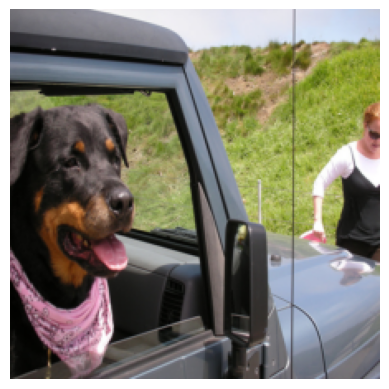

In [9]:
import tarfile
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
# 解压缩文件
tar_path = 'data/ILSVRC2012_img_val.tar'
# extract_path = 'data/ILSVRC2012_img_val'

# 定义图像转换
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 创建数据集
dataset = datasets.ImageNet(root='data/imagenet',split='val', transform=transform)

# 创建数据加载器
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True, num_workers=4)

# 迭代数据
found = False
for images, labels in dataloader:
    if 234 in labels:
        idx = (labels == 234).nonzero(as_tuple=True)[0].item()
        image = images[idx]
        found = True
        break

if found:
    # 反归一化图像
    inv_transform = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    image = inv_transform(image)
    image = image.permute(1, 2, 0).numpy()  # 转换为HWC格式
    image = np.clip(image, 0, 1)  # 将像素值限制在[0, 1]范围内

    # 可视化图像
    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("没有找到标签图像。")

In [7]:
from torchvision import datasets

# 创建ImageNet数据集对象
dataset = datasets.ImageNet(root='data/imagenet', split='val')

# 获取Rottweiler的标签序号
wnid = 'n02106550'
label_index = dataset.wnid_to_idx[wnid]

print(f"Rottweiler (n02106550) 的标签序号是: {label_index}")

Rottweiler (n02106550) 的标签序号是: 234


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 加载.npz文件
data = np.load('reference/imagenet/priority.npz')

# 获取文件中的所有数组
arrays = {key: data[key] for key in data}
arrays['x'].max()
# type(arrays['x'])
# # 打印每个数组的大小
# for key, array in arrays.items():
#     print(f"Array '{key}' size: {array.shape}")

# # 可视化第一个数组（假设是图像数据）
# first_key = list(arrays.keys())[0]
# first_array = arrays[first_key]

# # 检查数组是否是图像数据（假设是3通道图像）
# # if first_array.ndim == 3 and first_array.shape[2] == 3:
# plt.imshow(first_array[0])
# plt.axis('off')
# plt.show()


255

Array 'x' size: (1, 224, 224, 3)
Array 'y' size: (1,)
Array 'info' size: (1,)


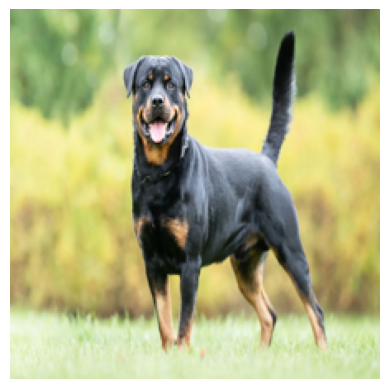

In [5]:
data = np.load('reference/imagenet/rottweiler.npz')

# 获取文件中的所有数组
arrays = {key: data[key] for key in data}
arrays['x'].max()

for key, array in arrays.items():
    print(f"Array '{key}' size: {array.shape}")

# 可视化第一个数组（假设是图像数据）
first_key = list(arrays.keys())[0]
first_array = arrays[first_key]

# 检查数组是否是图像数据（假设是3通道图像）
# if first_array.ndim == 3 and first_array.shape[2] == 3:
plt.imshow(first_array[0])
plt.axis('off')
plt.show()

In [4]:
import numpy as np

data = np.load('reference/imagenet/rottweiler.npz')

# 获取文件中的所有数组
arrays = {key: data[key] for key in data}
type(arrays['x'])


numpy.ndarray

In [25]:
from PIL import Image
import numpy as np

# 加载图像
image_path = 'reference/imagenet/rottweiler.jpg'
image = Image.open(image_path)

# 调整图像大小为(224, 224)
image_resized = image.resize((224, 224))

# 将图像转换为numpy数组，并调整形状为(1, 224, 224, 3)
image_array = np.array(image_resized)
image_array = image_array.reshape((1, 224, 224, 3))

# 创建标签和信息
label = np.array([234])  # 假设标签为12
info = np.array(['reference/imagenet/rottweiler.jpg'])

# 保存为.npz文件
np.savez('reference/imagenet/rottweiler.npz', x=image_array, y=label, info=info)

print("图像已成功保存为 rottweiler.npz")

图像已成功保存为 rottweiler.npz


In [ ]:
checkpoint = torch.load(args.pretrained_encoder)
state_dict = {k: v for k, v in checkpoint['state_dict'].items() if 'backbone.' in k}
new_state_dict = {k.replace('backbone.', ''): v for k, v in state_dict.items()}
model.load_state_dict(new_state_dict)
clean_model.load_state_dict(new_state_dict)